### First, we import some of the packages to be used

In [1]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

### We define some constants, we will use throughout the notebook


In [2]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

### Reading the dataset and storing the sentences and labels

In [3]:
with open("sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

### Split the dataset into training and testing sets

In [4]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

### Now, we tokenize the sentences and pad/truncate them to create consistent sequences

In [5]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [6]:
# We convert our training and testing sequence lists into numpy arrays
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

## Building our Model

### First, define the model

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

### Next, compile the model

In [8]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [9]:
## Summarize the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


### It's time to fit the model to our training data

In [11]:
num_epochs = 10
history = model.fit(training_padded, 
                    training_labels, 
                    epochs=num_epochs, 
                    validation_data=(testing_padded, testing_labels), 
                    verbose=2)

Epoch 1/10
625/625 - 1s - loss: 0.0245 - accuracy: 0.9929 - val_loss: 1.2209 - val_accuracy: 0.8138
Epoch 2/10
625/625 - 1s - loss: 0.0230 - accuracy: 0.9934 - val_loss: 1.1746 - val_accuracy: 0.8129
Epoch 3/10
625/625 - 1s - loss: 0.0216 - accuracy: 0.9940 - val_loss: 1.2431 - val_accuracy: 0.8123
Epoch 4/10
625/625 - 1s - loss: 0.0197 - accuracy: 0.9952 - val_loss: 1.2624 - val_accuracy: 0.8123
Epoch 5/10
625/625 - 1s - loss: 0.0177 - accuracy: 0.9948 - val_loss: 1.2536 - val_accuracy: 0.8103
Epoch 6/10
625/625 - 1s - loss: 0.0167 - accuracy: 0.9956 - val_loss: 1.3416 - val_accuracy: 0.8109
Epoch 7/10
625/625 - 1s - loss: 0.0154 - accuracy: 0.9958 - val_loss: 1.3328 - val_accuracy: 0.8107
Epoch 8/10
625/625 - 1s - loss: 0.0162 - accuracy: 0.9955 - val_loss: 1.3478 - val_accuracy: 0.8082
Epoch 9/10
625/625 - 1s - loss: 0.0135 - accuracy: 0.9963 - val_loss: 1.3831 - val_accuracy: 0.8068
Epoch 10/10
625/625 - 1s - loss: 0.0148 - accuracy: 0.9956 - val_loss: 1.4235 - val_accuracy: 0.8068

### Let's plot the loss and accuracy of the model

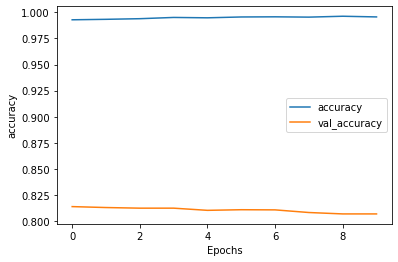

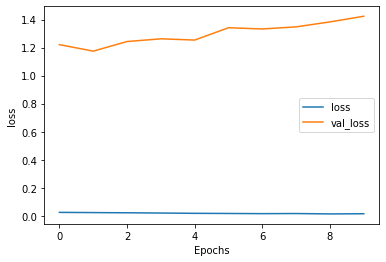

In [12]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")